# Introduction to OpenCV
### Dylan Seychell, Department of AI, University of Malta

## Setup

Import the OpenCV library (cv2) and check its version.

Import matplotlib and use the "%matplotlib inline" instruction to enable the library to display its output within the notebook.

Make sure both libaries are installed in your environment

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

cv2.__version__

'4.9.0'

## Importing Images

cv2.imread is used to load an image and store it into a variable

This function accepts 2 parameters:
The filename of the image 
colour space:
- 1: Colour, neglecting transparency 
- 0: Greyscale
- -1: Colour together with the alpha channel



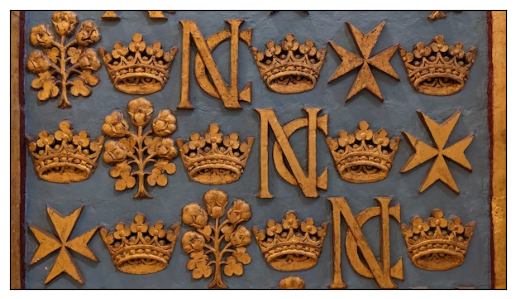

In [4]:
img = cv2.imread("./sjcmotif.jpg",1)
#try replacing the 1 with 0 above to see the greyscale effect.

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#xticks and yticks can be assigned an empty list so that the image is presented without axis.
plt.xticks([])
plt.yticks([])
plt.imshow(img)


## Image Data

type(img) tells us that images are being stored in a numpy array.

The datatype tells us it is an uint8, unsigned 8-bit integer where each pixel per channel has values in the range 0 - 255

In [5]:
print("type: ", type(img))
print("Datatype: ", img.dtype)

type:  <class 'numpy.ndarray'>
Datatype:  uint8


### Image Shape and Size

img.shape returns the number of rows (height of the image), the number of columns (width of the image) and the number of channels.  Specific values from shape can be obtained using the address in the array:
- [0] Height
- [1] width
- [2] channels

img.size returns the number of pixels in the image by multiplying the number of rows by columns and channels.

In [6]:
print("Shape (Height, Width, Channels): ", img.shape)
print("Width of the image = ", img.shape[1])

print("Size of the image h*w*3 =", img.size)

Shape (Height, Width, Channels):  (338, 600, 3)
Width of the image =  600
Size of the image h*w*3 = 608400


## Greyscale Images

Try out the above using a greyscale image.  In this case, cv2.cvtColor us used to convert the image to greyscale.

([], [])

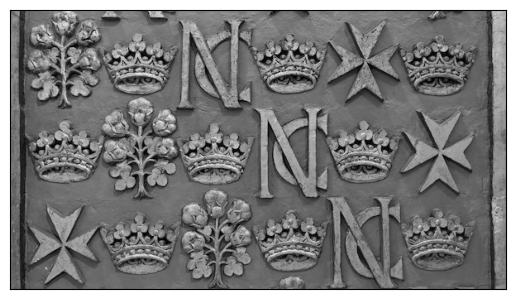

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.xticks([])
plt.yticks([])

In [8]:
gray.shape

(338, 600)

In [9]:
gray

array([[104, 102,  99, ..., 145, 144, 148],
       [107, 109, 106, ..., 144, 148, 153],
       [104,  99,  98, ..., 143, 149, 152],
       ...,
       [ 93,  91,  92, ..., 108, 111, 111],
       [ 91,  91,  92, ..., 106, 106, 109],
       [ 91,  91,  91, ..., 103, 103, 106]], dtype=uint8)

# Histograms

You can use either the cv2 histogram generator or the plt.  

cv2's histogram is created using the following function **cv2.calcHist(images, channels, mask, bins, ranges)**

This workbook uses the plt implementation that generates it using the following function **plt.hist(image.ravel(), bins=256, range=(0.0, 255.0))**

The function returns the values that are used to generate the histogram while also returning a visual representation.

(array([0.000e+00, 3.000e+00, 6.100e+01, 1.050e+02, 3.010e+02, 2.580e+02,
        2.750e+02, 3.650e+02, 2.290e+02, 2.320e+02, 2.790e+02, 2.040e+02,
        2.030e+02, 2.090e+02, 2.010e+02, 2.410e+02, 2.360e+02, 2.240e+02,
        2.600e+02, 2.650e+02, 2.450e+02, 2.760e+02, 2.740e+02, 3.450e+02,
        3.110e+02, 3.240e+02, 3.980e+02, 3.730e+02, 4.390e+02, 4.510e+02,
        4.390e+02, 5.020e+02, 4.260e+02, 5.330e+02, 5.290e+02, 5.450e+02,
        5.560e+02, 5.700e+02, 5.710e+02, 5.730e+02, 5.990e+02, 5.130e+02,
        5.900e+02, 5.740e+02, 6.330e+02, 6.140e+02, 6.570e+02, 6.570e+02,
        6.600e+02, 6.620e+02, 6.460e+02, 7.420e+02, 7.310e+02, 7.100e+02,
        7.810e+02, 7.530e+02, 7.840e+02, 8.670e+02, 8.990e+02, 9.570e+02,
        9.670e+02, 9.340e+02, 9.820e+02, 1.086e+03, 1.142e+03, 1.188e+03,
        1.233e+03, 1.241e+03, 1.280e+03, 1.297e+03, 1.405e+03, 1.467e+03,
        1.504e+03, 1.548e+03, 1.756e+03, 1.923e+03, 2.014e+03, 2.202e+03,
        2.264e+03, 2.464e+03, 2.721e+0

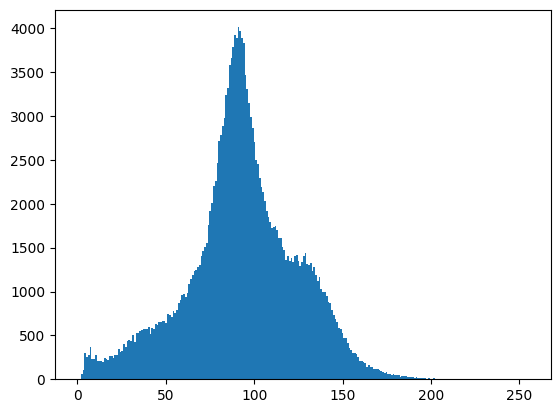

In [10]:
plt.hist(gray.ravel(), bins=256, range=(0.0, 255.0))


### Histogram Examples

Below follow two examples of different histograms.  One image is a darkened version of the image used above while the other is a brighter one.  The pixel values in the dark image are lower so the histogram shows higher frequency in the range closer to zero.  On the other hand, the bright image's pixels have higher values and therefore the histogram is skewed towards the right hand side.

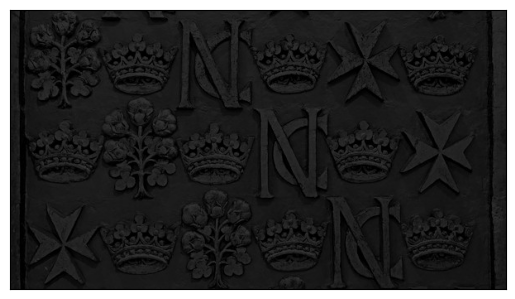

In [11]:
imgDark = cv2.imread("./sjcmotifDark.jpg")
imgDark = cv2.cvtColor(imgDark, cv2.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(imgDark)



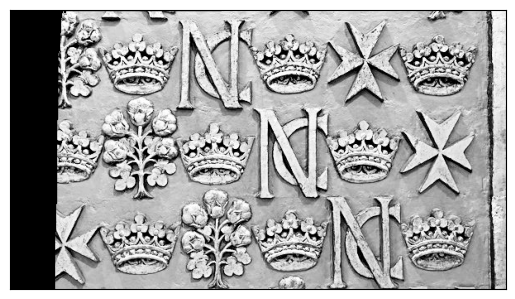

In [12]:
plt.hist(imgDark.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

imgBright = cv2.imread("./sjcmotifBright.jpg")
imgBright = cv2.cvtColor(imgBright, cv2.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.imshow(imgBright)

(array([12162.,  2289.,  2190.,  1863.,  1680.,  1350.,  1101.,  1062.,
          801.,   666.,   618.,   621.,   630.,   693.,   585.,   603.,
          699.,   750.,   702.,   636.,   606.,   624.,   639.,   627.,
          666.,   675.,   669.,   762.,   699.,   600.,   603.,   654.,
          477.,   654.,   603.,   597.,   606.,   654.,   777.,   804.,
          792.,   774.,   654.,   705.,   651.,   582.,   672.,   648.,
          681.,   669.,   720.,   681.,   642.,   615.,   696.,   702.,
          657.,   660.,   702.,   744.,   804.,   777.,   675.,   753.,
          747.,   717.,   729.,   681.,   711.,   660.,   738.,   696.,
          816.,   771.,   747.,   852.,   750.,   813.,   777.,   771.,
          720.,   834.,   762.,   786.,   771.,   780.,   777.,   828.,
          747.,   795.,   789.,   747.,   888.,   867.,   888.,   828.,
          837.,   888.,   957.,   876.,   864.,   993.,  1011.,  1011.,
          996.,  1044.,   996.,   945.,   987.,  1032.,  1092., 

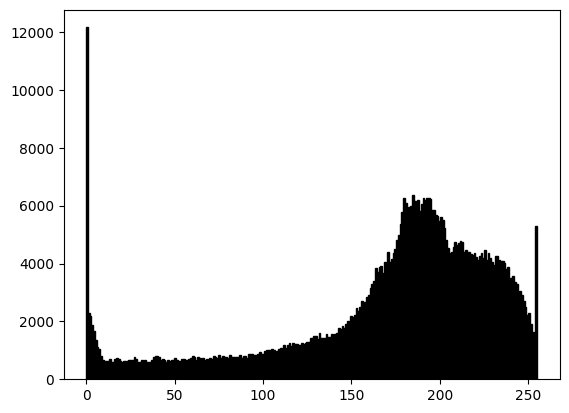

In [13]:
plt.hist(imgBright.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

***

End of Notebook

Dylan Seychell
dylan.seychell@um.edu.mt